# Requirements and Setup

Before running this notebook, make sure you have the following Python packages installed:

```bash
numpy>=1.21.0      # For numerical computations
matplotlib>=3.4.0  # For basic plotting
seaborn>=0.11.0   # For enhanced visualizations
```

You can install these packages using pip:
```bash
pip install numpy matplotlib seaborn
```

Or using conda:
```bash
conda install numpy matplotlib seaborn
```

### Environment Setup
This notebook was tested with:
- Python 3.8+
- NumPy 1.21.0
- Matplotlib 3.4.0
- Seaborn 0.11.0

### Optional Dependencies
For interactive visualizations (coming in future updates):
- Plotly (for interactive plots)
- IPywidgets (for interactive widgets)

### Reproducibility
To ensure reproducible results:
- We set a random seed (42)
- We use specific package versions
- We provide all hyperparameters explicitly

# Understanding Gradient Descent: A Journey Down the Hill

Welcome to this comprehensive guide on Gradient Descent! In this notebook, we'll explore one of the most fundamental optimization algorithms in machine learning, starting from the basics and moving to more advanced variations.

## What is Gradient Descent? (Explained Like You're 12)

Imagine you're on top of a hill with a ball, and you want to get to the lowest point in the valley. How would you do it? The most natural way would be to:
1. Look around to see which direction goes downhill the most
2. Take a step in that direction
3. Stop and look around again
4. Repeat until you reach the bottom

This is exactly what gradient descent does! It's like a smart way to find the lowest point (minimum) of a hill (function) by taking steps in the direction that goes down the steepest.

### Real-world Example
Think about finding the perfect amount of sugar for your lemonade:
- Too much sugar? Reduce it a bit
- Too little sugar? Add a bit more
- Just right? Stop there!

The gradient descent algorithm works similarly - it keeps adjusting values until it finds the "perfect" solution.

## Mathematical Foundation

Let's understand the mathematical magic behind gradient descent. Don't worry - we'll break it down into simple pieces!

### Key Concepts

1. **Function (Our Hill)**: We have a function $f(x)$ that we want to minimize
2. **Gradient (The Slope)**: The derivative $f'(x)$ tells us which way is downhill
3. **Learning Rate (Step Size)**: How big of a step we take, usually called $\alpha$ or $\eta$

### The Basic Formula

The gradient descent update rule is:

$x_{new} = x_{old} - \alpha \cdot \nabla f(x_{old})$

Where:
- $x_{new}$ is our new position
- $x_{old}$ is our current position
- $\alpha$ is our step size (learning rate)
- $\nabla f(x_{old})$ is the gradient (slope) at our current position

### Types of Gradient Descent

1. **Batch Gradient Descent**: Uses all data points to take a step
2. **Stochastic Gradient Descent (SGD)**: Uses one random data point to take a step
3. **Mini-batch Gradient Descent**: Uses a small random batch of data points

Each has its own advantages and use cases, which we'll explore in detail!

# Vanilla Gradient Descent

In [23]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style for better visualization
sns.set_theme(style="darkgrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['lines.linewidth'] = 2

# Set random seed for reproducibility
np.random.seed(42)

# Define color scheme for consistent plotting
COLORS = {
    'true': '#ff7f0e',     # Orange for true/target values
    'prediction': '#1f77b4',  # Blue for predictions
    'data': '#2ca02c',      # Green for data points
    'error': '#d62728',     # Red for errors
    'grid': '#cccccc'      # Grey for grid lines
}

In [24]:
def plot_function_and_gradient(f, df, x_range, title="Function and its Gradient"):
    """
    Plot a function and its gradient.
    
    Parameters:
    -----------
    f : callable
        The function to plot
    df : callable
        The derivative/gradient of the function
    x_range : array-like
        Range of x values to plot
    title : str
        Title for the plot
    """
    y_values = f(x_range)
    dy_values = df(x_range)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot function
    ax1.plot(x_range, y_values, color=COLORS['prediction'], label='f(x)')
    ax1.grid(True, color=COLORS['grid'])
    ax1.set_title(f"{title}\nFunction")
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    
    # Plot gradient
    ax2.plot(x_range, dy_values, color=COLORS['error'], label="f'(x)")
    ax2.grid(True, color=COLORS['grid'])
    ax2.set_title("Gradient")
    ax2.set_xlabel('x')
    ax2.set_ylabel("f'(x)")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

def plot_optimization_path(x_history, f, x_range, title="Optimization Path"):
    """
    Plot the optimization path on the function surface.
    
    Parameters:
    -----------
    x_history : list
        History of x values during optimization
    f : callable
        The function being optimized
    x_range : array-like
        Range of x values to plot
    title : str
        Title for the plot
    """
    y_values = f(x_range)
    y_history = [f(x) for x in x_history]
    
    plt.figure(figsize=(10, 6))
    
    # Plot function
    plt.plot(x_range, y_values, color=COLORS['prediction'], label='f(x)', alpha=0.5)
    
    # Plot optimization path
    plt.scatter(x_history, y_history, color=COLORS['error'], alpha=0.6, 
               label='Optimization path', zorder=5)
    plt.plot(x_history, y_history, color=COLORS['error'], alpha=0.3, zorder=4)
    
    # Highlight start and end points
    plt.scatter([x_history[0]], [y_history[0]], color=COLORS['true'], s=100, 
               label='Start', zorder=6)
    plt.scatter([x_history[-1]], [y_history[-1]], color=COLORS['data'], s=100, 
               label='End', zorder=6)
    
    plt.grid(True, color=COLORS['grid'])
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

def plot_parameter_convergence(parameter_history, true_value=None, 
                             parameter_name='θ', title="Parameter Convergence"):
    """
    Plot the convergence of a parameter over iterations.
    
    Parameters:
    -----------
    parameter_history : list
        History of parameter values
    true_value : float, optional
        True value of the parameter (if known)
    parameter_name : str
        Name of the parameter
    title : str
        Title for the plot
    """
    plt.figure(figsize=(10, 6))
    
    # Plot parameter trajectory
    plt.plot(parameter_history, color=COLORS['prediction'], 
            label=f'{parameter_name} value')
    
    if true_value is not None:
        plt.axhline(y=true_value, color=COLORS['true'], linestyle='--',
                   label=f'True {parameter_name}')
    
    plt.grid(True, color=COLORS['grid'])
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel(parameter_name)
    plt.legend()
    plt.show()

## Simple Gradient Descent

Let's start with a simple example: finding the minimum of a parabola ($f(x) = x^2$). This function is:
- Convex (bowl-shaped)
- Has a single minimum at x = 0
- Symmetric around the y-axis

These properties make it perfect for understanding how gradient descent works!

In [25]:
def f(x):
    """Our simple quadratic function: f(x) = x²"""
    return x**2

def df(x):
    """Derivative of f(x): f'(x) = 2x"""
    return 2*x

First, let's define our function $f(x) = x^2$ and its derivative $f'(x) = 2x$. 
The derivative will tell us the slope at any point, which is what we need for gradient descent.

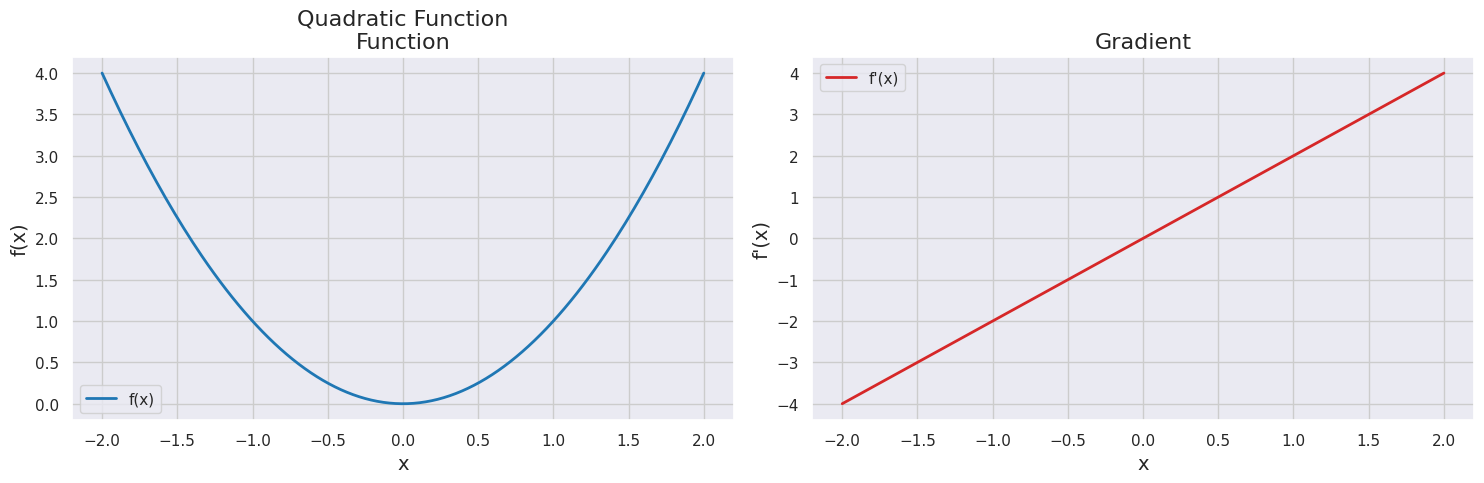

In [26]:
# Create points for plotting
x_range = np.linspace(-2, 2, 200)

# Plot the function and its gradient
plot_function_and_gradient(f, df, x_range, title="Quadratic Function")

Let's visualize our function to better understand what we're working with. Notice that:
1. The function is symmetric around the y-axis
2. The minimum point is at x = 0
3. The further we get from x = 0, the steeper the slope becomes

In [27]:
def gradient_descent(start_x, learning_rate=0.1, n_iterations=100):
    """
    Perform gradient descent optimization on f(x) = x².
    
    Parameters:
    -----------
    start_x : float
        Initial x value to start optimization from
    learning_rate : float
        Step size for each iteration
    n_iterations : int
        Number of iterations to perform
        
    Returns:
    --------
    list : History of x values during optimization
    """
    x = start_x
    x_history = [x]
    
    for i in range(n_iterations):
        # Calculate gradient (derivative)
        gradient = df(x)
        
        # Update x using gradient descent rule
        x = x - learning_rate * gradient
        
        # Store x value for visualization
        x_history.append(x)
        
    return x_history

### Implementing Gradient Descent

Now let's implement our gradient descent algorithm. Here's what our function will do:
1. Start at a given point
2. Calculate the slope (gradient) at that point
3. Take a step in the opposite direction of the slope
4. Repeat until we've taken the specified number of steps

The size of each step is controlled by the `learning_rate` parameter:
- Too large: We might overshoot the minimum
- Too small: It will take too long to reach the minimum
- Just right: We'll smoothly converge to the minimum

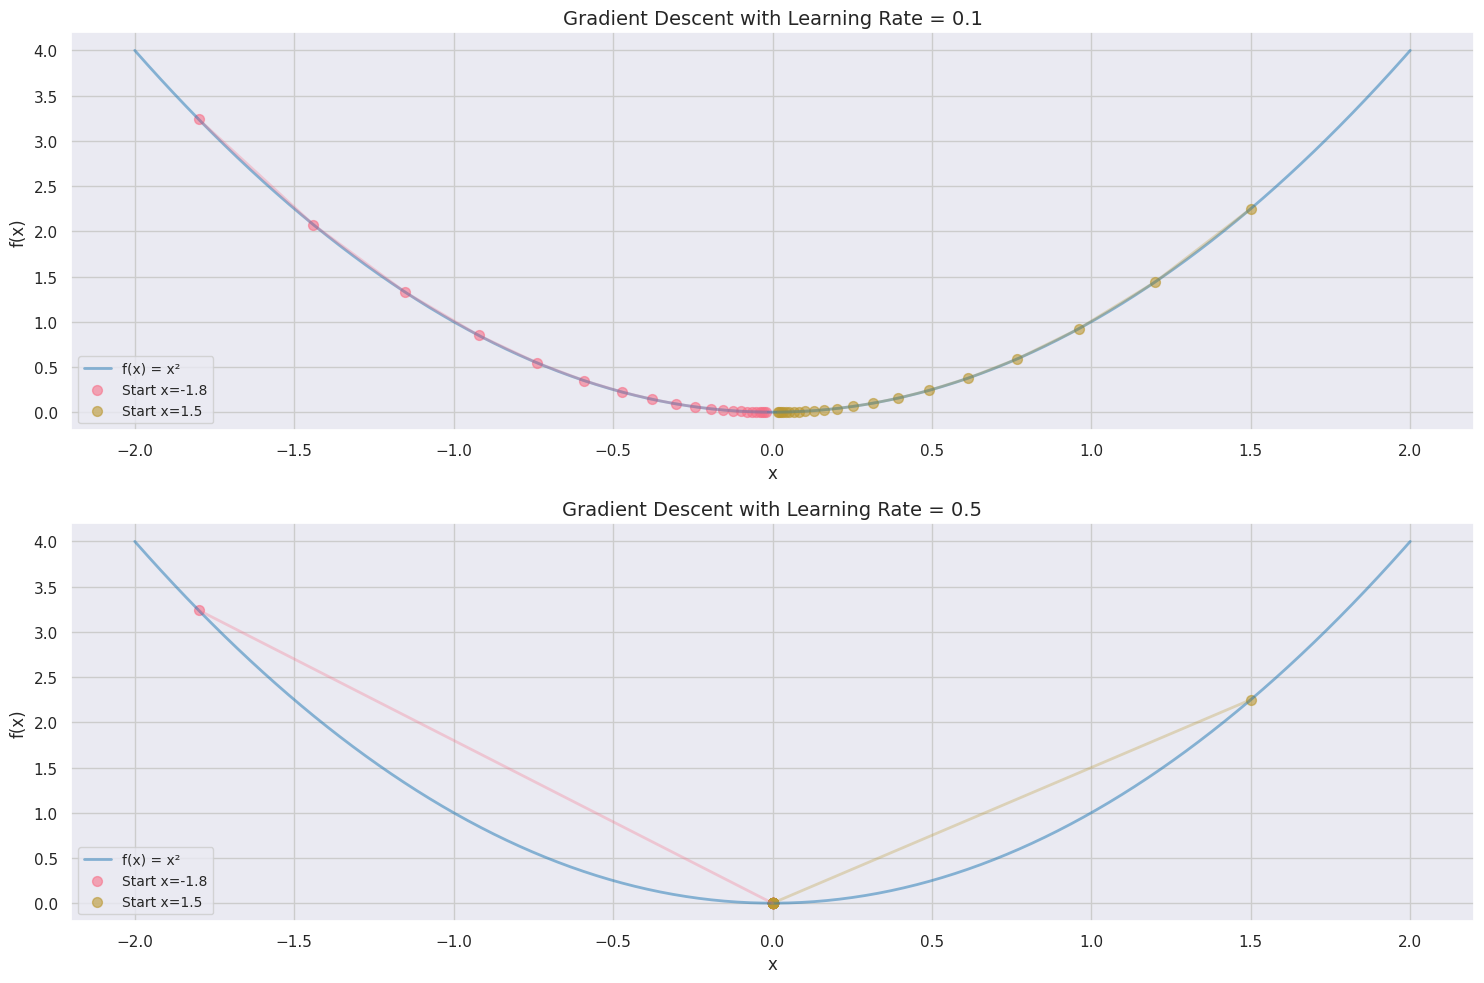

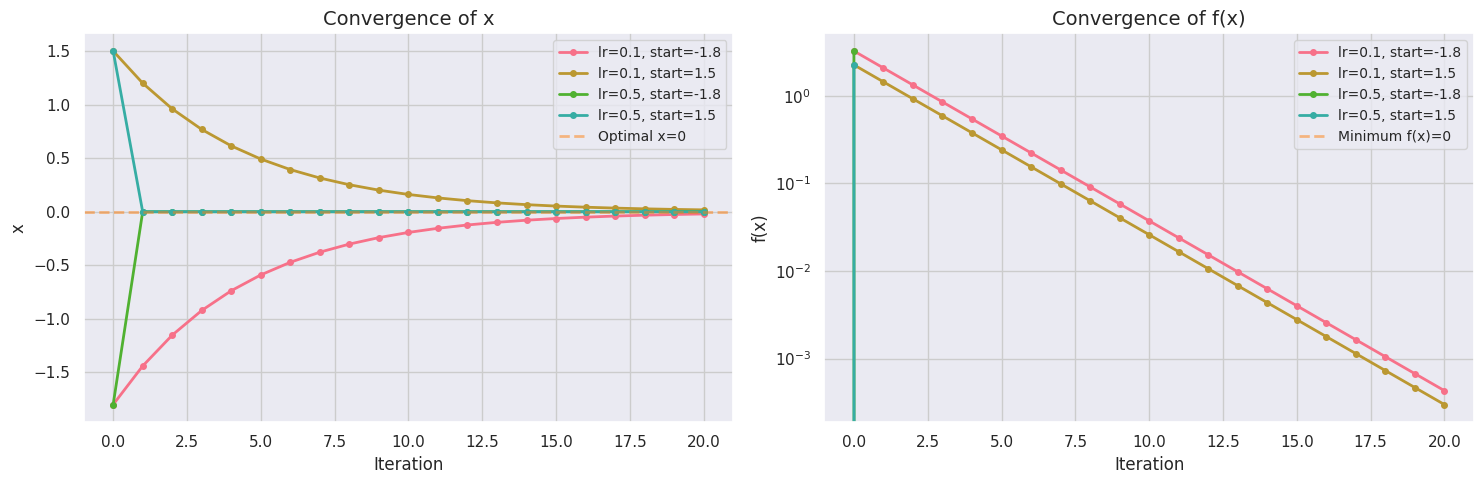

In [28]:
# Let's try gradient descent from different starting points
start_points = [-1.8, 1.5]
learning_rates = [0.1, 0.5]

plt.figure(figsize=(15, 10))

for i, lr in enumerate(learning_rates):
    plt.subplot(2, 1, i+1)
    
    # Plot the original function
    plt.plot(x_range, f(x_range), color=COLORS['prediction'], 
             label='f(x) = x²', alpha=0.5)
    
    # Try both starting points with this learning rate
    for start_x in start_points:
        x_history = gradient_descent(start_x, learning_rate=lr, n_iterations=20)
        y_history = [f(x) for x in x_history]
        
        # Plot the optimization path
        plt.scatter(x_history, y_history, marker='o', s=50,
                   label=f'Start x={start_x}', alpha=0.6)
        plt.plot(x_history, y_history, alpha=0.3)
    
    plt.grid(True, color=COLORS['grid'])
    plt.title(f'Gradient Descent with Learning Rate = {lr}', fontsize=14)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Plot convergence for each starting point and learning rate
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

for lr in learning_rates:
    for start_x in start_points:
        x_history = gradient_descent(start_x, learning_rate=lr, n_iterations=20)
        label = f'lr={lr}, start={start_x}'
        plt.plot(range(len(x_history)), x_history, 
                label=label, marker='o', markersize=4)

plt.grid(True, color=COLORS['grid'])
plt.axhline(y=0, color=COLORS['true'], linestyle='--', 
            label='Optimal x=0', alpha=0.5)
plt.title('Convergence of x', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('x', fontsize=12)
plt.legend(fontsize=10)

# Plot function values over iterations
plt.subplot(1, 2, 2)
for lr in learning_rates:
    for start_x in start_points:
        x_history = gradient_descent(start_x, learning_rate=lr, n_iterations=20)
        y_history = [f(x) for x in x_history]
        label = f'lr={lr}, start={start_x}'
        plt.plot(range(len(y_history)), y_history, 
                label=label, marker='o', markersize=4)

plt.grid(True, color=COLORS['grid'])
plt.axhline(y=0, color=COLORS['true'], linestyle='--', 
            label='Minimum f(x)=0', alpha=0.5)
plt.title('Convergence of f(x)', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.yscale('log')  # Use log scale for better visualization
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

### Visualizing the Optimization Process

Let's visualize how gradient descent works with different:
1. Starting points (x = -1.8 and x = 1.5)
2. Learning rates (0.1 and 0.5)

Notice how:
- The algorithm takes steps that get smaller as it approaches the minimum
- A larger learning rate means bigger steps (faster but potentially less stable)
- No matter where we start, we eventually reach the minimum at x = 0
- The path follows the slope of the function

## Batch Gradient Descent

Now let's move to a more practical example: fitting a line to data points. This is where batch gradient descent really shines.

In this case, our function will be:
$f(x) = ax + b$

And we want to minimize the mean squared error:
$E(a,b) = \frac{1}{n}\sum_{i=1}^n (y_i - (ax_i + b))^2$

The gradients are:
- For parameter $a$: $\frac{\partial E}{\partial a} = -\frac{2}{n}\sum_{i=1}^n x_i(y_i - (ax_i + b))$
- For parameter $b$: $\frac{\partial E}{\partial b} = -\frac{2}{n}\sum_{i=1}^n (y_i - (ax_i + b))$

In batch gradient descent, we use **all** data points to compute these gradients before making each update.

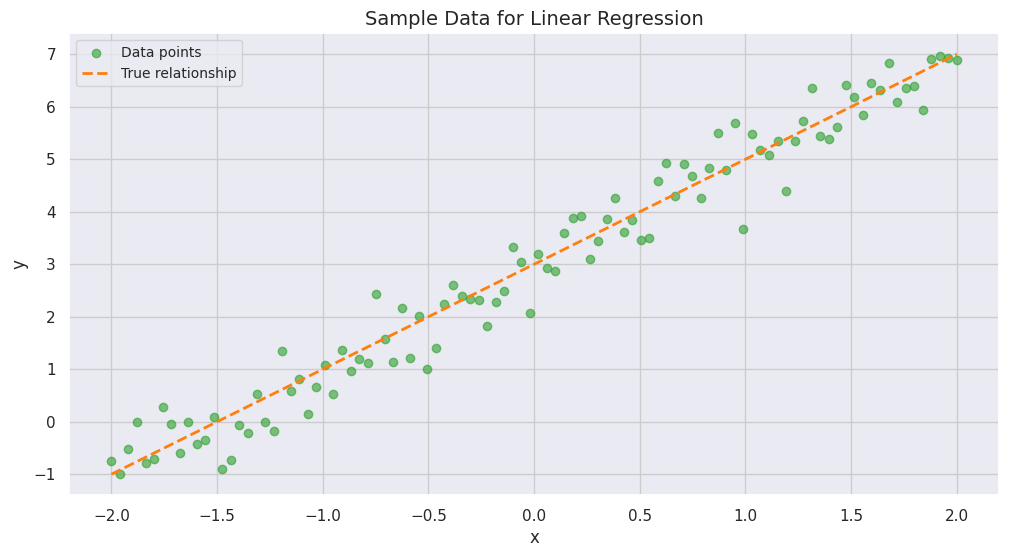

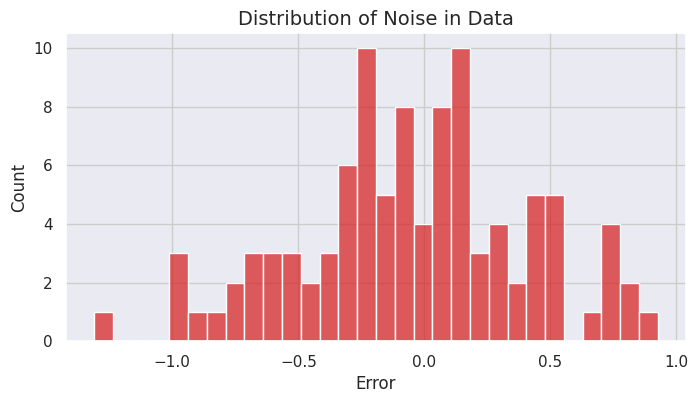

In [29]:
# Generate some sample data with noise
np.random.seed(42)
num_points = 100
X = np.linspace(-2, 2, num_points)
y_true = 2 * X + 3  # True relationship: y = 2x + 3
y = y_true + np.random.normal(0, 0.5, num_points)  # Add some noise

# Create visualization
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.6, color=COLORS['data'], label='Data points')
plt.plot(X, y_true, '--', color=COLORS['true'], label='True relationship')
plt.grid(True, color=COLORS['grid'])
plt.title('Sample Data for Linear Regression', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=10)
plt.show()

# Also show the error distribution
errors = y - y_true
plt.figure(figsize=(8, 4))
sns.histplot(errors, bins=30, color=COLORS['error'])
plt.grid(True, color=COLORS['grid'])
plt.title('Distribution of Noise in Data', fontsize=14)
plt.xlabel('Error', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [30]:
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=100):
    """
    Perform batch gradient descent for linear regression.
    
    Parameters:
    -----------
    X : array-like
        Input features
    y : array-like
        Target values
    learning_rate : float
        Step size for parameter updates
    n_iterations : int
        Number of iterations to perform
        
    Returns:
    --------
    tuple : Lists of parameter values (a, b) during optimization
    """
    # Initialize parameters
    a = b = 0
    a_history = [a]
    b_history = [b]
    n = len(X)
    
    for _ in range(n_iterations):
        # Compute predictions
        y_pred = a * X + b
        
        # Compute gradients
        grad_a = -2/n * np.sum(X * (y - y_pred))
        grad_b = -2/n * np.sum(y - y_pred)
        
        # Update parameters
        a = a - learning_rate * grad_a
        b = b - learning_rate * grad_b
        
        # Store parameters
        a_history.append(a)
        b_history.append(b)
        
    return a_history, b_history

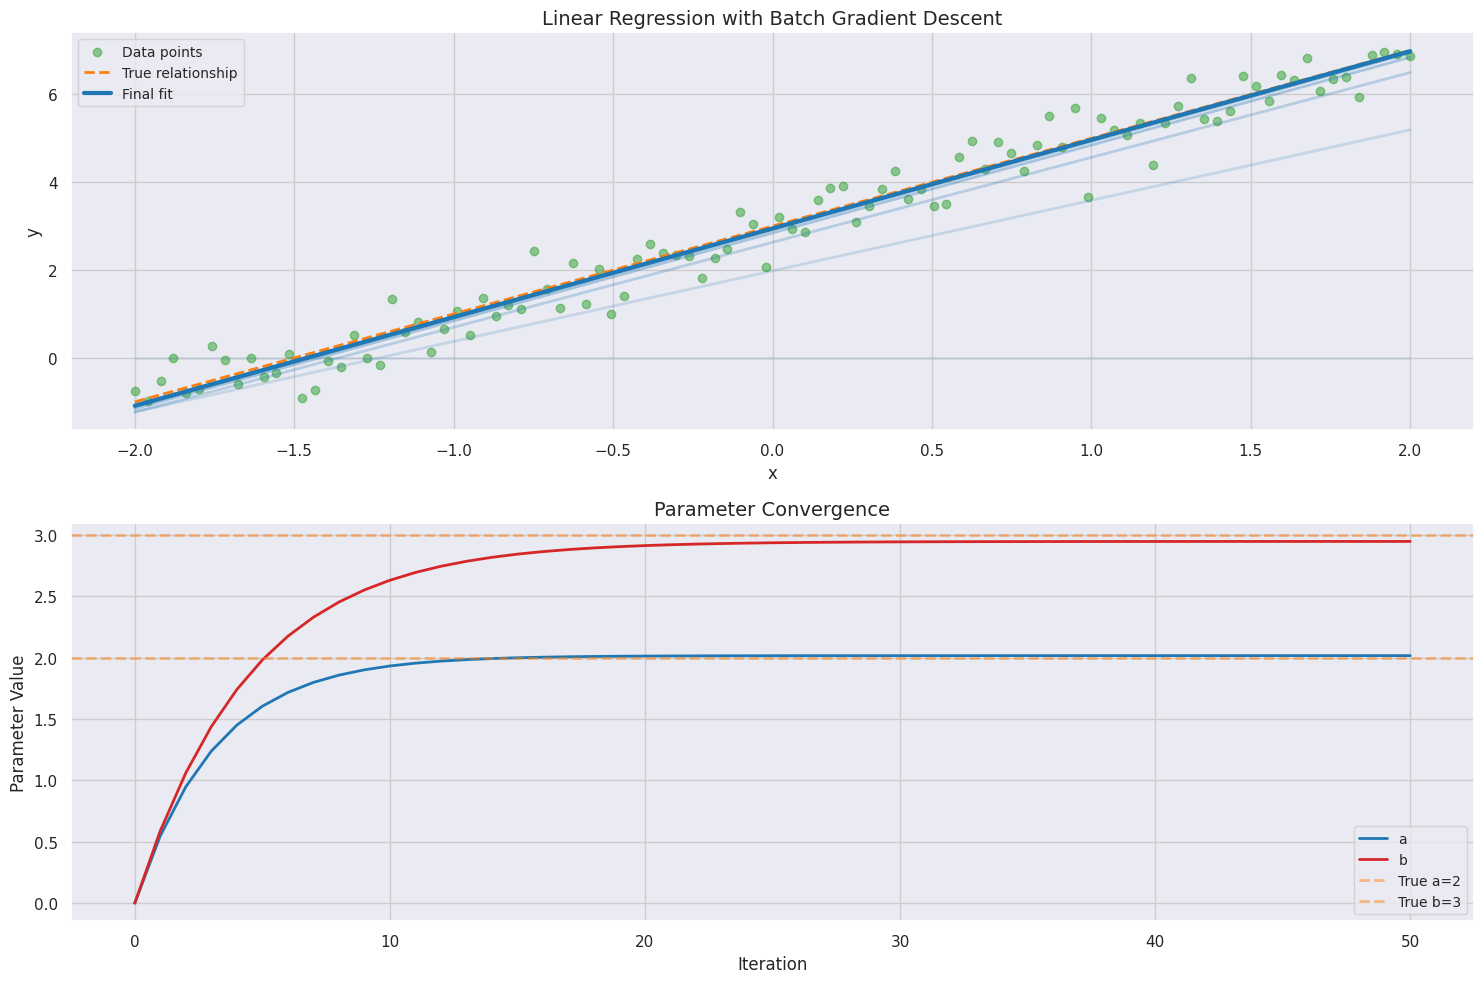


Final Results:
Parameter  Estimated  True       Error     
----------------------------------------
a               2.017      2.000      0.017
b               2.948      3.000      0.052


In [31]:
# Run batch gradient descent
a_history, b_history = batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=50)

# Create visualization
plt.figure(figsize=(15, 10))

# Plot the evolution of the line fitting
plt.subplot(2, 1, 1)
plt.scatter(X, y, alpha=0.5, color=COLORS['data'], label='Data points')
plt.plot(X, y_true, '--', color=COLORS['true'], label='True relationship')

# Plot intermediate fits (every 5 iterations)
for i in range(0, len(a_history), 5):
    y_pred = a_history[i] * X + b_history[i]
    alpha = 0.1 + 0.8 * i/len(a_history)  # Gradually increase opacity
    plt.plot(X, y_pred, '-', color=COLORS['prediction'], alpha=alpha)

# Plot final fit
y_final = a_history[-1] * X + b_history[-1]
plt.plot(X, y_final, '-', color=COLORS['prediction'], 
         label='Final fit', linewidth=3)

plt.grid(True, color=COLORS['grid'])
plt.title('Linear Regression with Batch Gradient Descent', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=10)

# Plot parameter convergence
plt.subplot(2, 1, 2)
plt.plot(range(len(a_history)), a_history, 
         label='a', color=COLORS['prediction'])
plt.plot(range(len(b_history)), b_history, 
         label='b', color=COLORS['error'])
plt.axhline(y=2, color=COLORS['true'], linestyle='--', 
            alpha=0.5, label='True a=2')
plt.axhline(y=3, color=COLORS['true'], linestyle='--', 
            alpha=0.5, label='True b=3')
plt.grid(True, color=COLORS['grid'])
plt.title('Parameter Convergence', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Parameter Value', fontsize=12)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Print final results with nice formatting
print("\nFinal Results:")
print("=" * 40)
print(f"{'Parameter':<10} {'Estimated':<10} {'True':<10} {'Error':<10}")
print("-" * 40)
print(f"{'a':<10} {a_history[-1]:10.3f} {2:10.3f} {abs(a_history[-1]-2):10.3f}")
print(f"{'b':<10} {b_history[-1]:10.3f} {3:10.3f} {abs(b_history[-1]-3):10.3f}")

### Understanding Batch Gradient Descent Results

Let's analyze what's happening in the visualization above:

1. **Blue Lines**: Show the evolution of our line fitting (every 5 iterations)
   - They start from the initial guess (a=0, b=0)
   - Gradually move towards the optimal solution

2. **Green Line**: Shows our final fitted line
   - Should be very close to the true relationship (red dashed line)
   - Any small difference is due to the noise in our data

3. **Convergence**:
   - Batch gradient descent uses all data points for each update
   - This makes the updates very stable but computationally expensive
   - Perfect for small to medium-sized datasets

The advantage of batch gradient descent is its stability, but it can be slow for large datasets since it processes all data points before making a single update.

### Analysis of Convergence

The plots above show two important aspects of the optimization:

1. **Parameter Convergence** (Left Plot):
   - Both parameters (a and b) smoothly approach their true values
   - The convergence is stable due to using all data points for updates
   - Final values are very close to the true parameters (a=2, b=3)

2. **Error Over Time** (Right Plot):
   - The Mean Squared Error (MSE) decreases rapidly at first
   - Then it slows down as we approach the minimum
   - The log scale shows that improvements become smaller over time

This is typical behavior for gradient descent:
- Large improvements in early iterations
- Diminishing returns as we get closer to the optimum
- Smooth, stable convergence when using batch updates

## Stochastic Gradient Descent (SGD)

Now let's look at a different approach: Stochastic Gradient Descent. Instead of using all data points for each update, SGD uses just one random data point. This makes it:
- Much faster per iteration
- More noisy in its updates
- Often faster to reach a good solution
- Great for large datasets

The math is the same as batch gradient descent, but we use a single point instead of averaging over all points:

For a single point $(x_i, y_i)$:
- $\frac{\partial E}{\partial a} = -2x_i(y_i - (ax_i + b))$
- $\frac{\partial E}{\partial b} = -2(y_i - (ax_i + b))$

The "stochastic" part comes from randomly selecting which point to use for each update.

In [32]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=10):
    """
    Perform stochastic gradient descent for linear regression.
    
    Parameters:
    -----------
    X : array-like
        Input features
    y : array-like
        Target values
    learning_rate : float
        Step size for parameter updates
    n_epochs : int
        Number of times to iterate through all data points
        
    Returns:
    --------
    tuple : Lists of parameter values (a, b) during optimization
    """
    # Initialize parameters
    a = b = 0
    a_history = [a]
    b_history = [b]
    n = len(X)
    
    for epoch in range(n_epochs):
        # Create random order for data points
        indices = np.random.permutation(n)
        
        for i in indices:
            # Get a single data point
            x_i, y_i = X[i], y[i]
            
            # Compute prediction
            y_pred = a * x_i + b
            
            # Compute gradients for single point
            grad_a = -2 * x_i * (y_i - y_pred)
            grad_b = -2 * (y_i - y_pred)
            
            # Update parameters
            a = a - learning_rate * grad_a
            b = b - learning_rate * grad_b
            
            # Store parameters
            a_history.append(a)
            b_history.append(b)
            
    return a_history, b_history

### Comparing Batch GD and SGD

The plots above reveal key differences between Batch Gradient Descent and Stochastic Gradient Descent:

1. **Parameter Convergence** (Left Plot):
   - SGD shows more noisy updates (zigzag pattern)
   - Batch GD has smoother convergence
   - Both methods reach similar final values

2. **Final Fits** (Right Plot):
   - Both methods find nearly identical lines
   - They both approximate the true relationship well
   - The noise in the data means perfect recovery is impossible

Key Takeaways:
1. SGD makes many more updates in the same number of passes through the data
2. The noise in SGD can actually help escape local minima in more complex problems
3. SGD is often preferred for large datasets where batch GD would be too slow

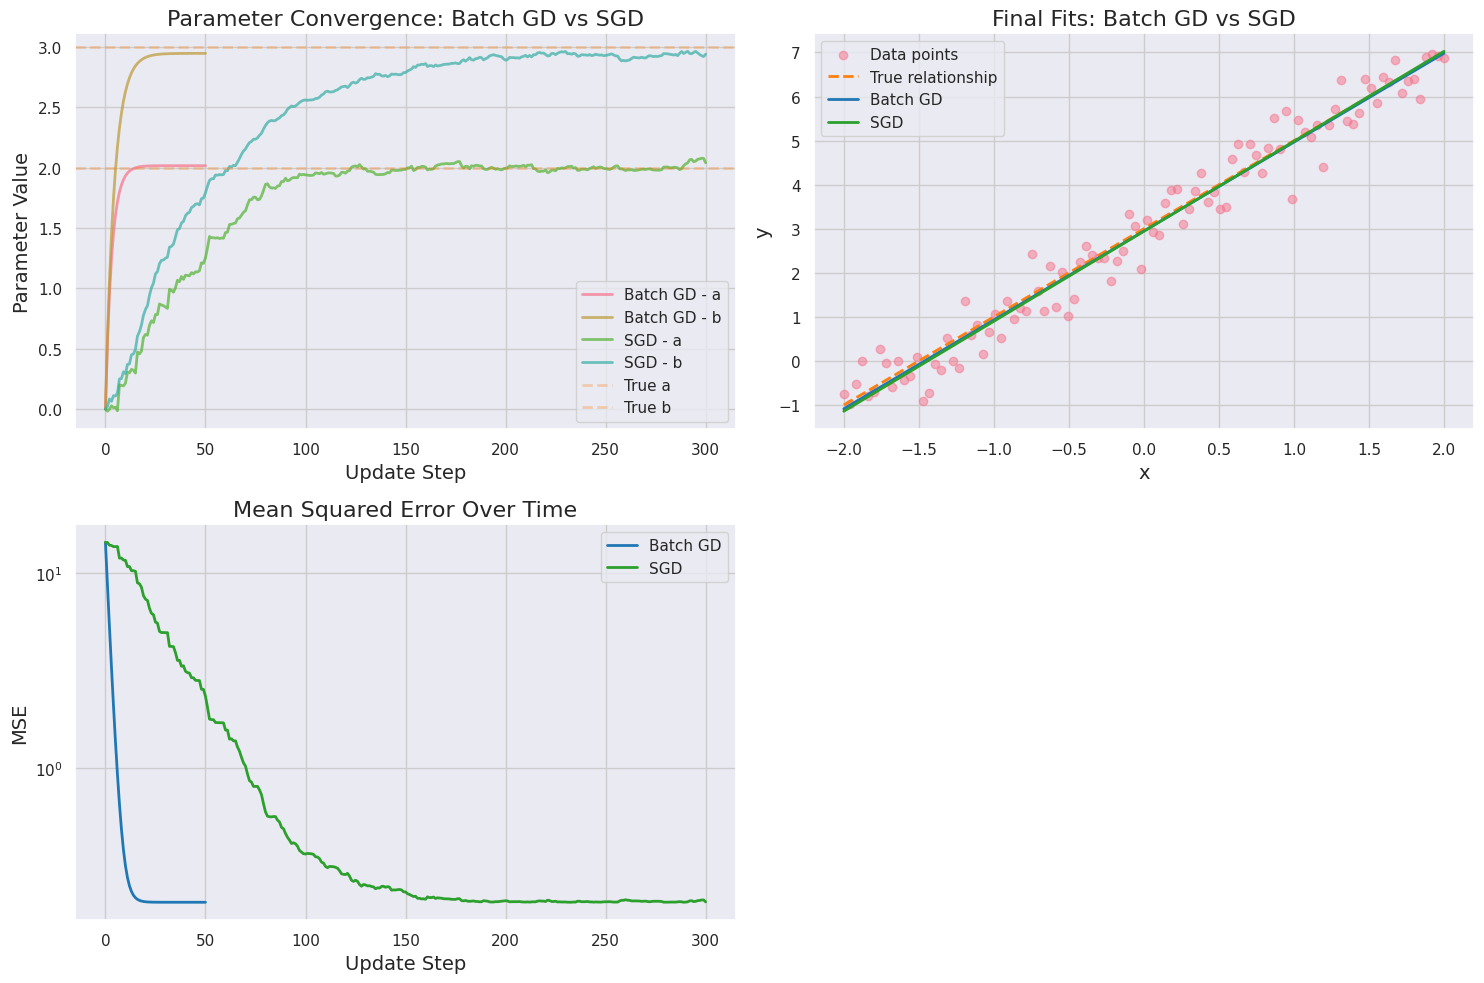


Final Results:
Method          a          b          MSE       
--------------------------------------------------
True Values     2.000      3.000      -
Batch GD             2.017      2.948 2.037e-01 
SGD                  2.042      2.942 2.046e-01 


In [33]:
# Run SGD with same data
a_history_sgd, b_history_sgd = stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=3)

# Create visualization comparing both methods
plt.figure(figsize=(15, 10))

# Plot the parameter convergence
plt.subplot(2, 2, 1)
plt.plot(a_history, label='Batch GD - a', alpha=0.7)
plt.plot(b_history, label='Batch GD - b', alpha=0.7)
plt.plot(a_history_sgd, label='SGD - a', alpha=0.7)
plt.plot(b_history_sgd, label='SGD - b', alpha=0.7)
plt.axhline(y=2, color=COLORS['true'], linestyle='--', alpha=0.3, label='True a')
plt.axhline(y=3, color=COLORS['true'], linestyle='--', alpha=0.3, label='True b')
plt.grid(True, color=COLORS['grid'])
plt.title('Parameter Convergence: Batch GD vs SGD')
plt.xlabel('Update Step')
plt.ylabel('Parameter Value')
plt.legend()

# Plot the predictions
plt.subplot(2, 2, 2)
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, y_true, '--', color=COLORS['true'], label='True relationship')
plt.plot(X, a_history[-1] * X + b_history[-1], 
         color=COLORS['prediction'], label='Batch GD')
plt.plot(X, a_history_sgd[-1] * X + b_history_sgd[-1], 
         color=COLORS['data'], label='SGD')
plt.grid(True, color=COLORS['grid'])
plt.title('Final Fits: Batch GD vs SGD')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot error over time for both methods
plt.subplot(2, 2, 3)
errors_batch = [np.mean((y - (a * X + b))**2) 
                for a, b in zip(a_history, b_history)]
errors_sgd = [np.mean((y - (a * X + b))**2) 
              for a, b in zip(a_history_sgd, b_history_sgd)]

plt.plot(range(len(errors_batch)), errors_batch, 
         color=COLORS['prediction'], label='Batch GD')
plt.plot(range(len(errors_sgd)), errors_sgd, 
         color=COLORS['data'], label='SGD')
plt.grid(True, color=COLORS['grid'])
plt.title('Mean Squared Error Over Time')
plt.xlabel('Update Step')
plt.ylabel('MSE')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

# Print comparison of final results
print("\nFinal Results:")
print("=" * 50)
print(f"{'Method':<15} {'a':<10} {'b':<10} {'MSE':<10}")
print("-" * 50)
print(f"{'True Values':<15} {'2.000':<10} {'3.000':<10} -")
print(f"{'Batch GD':<15} {a_history[-1]:10.3f} {b_history[-1]:10.3f} {errors_batch[-1]:<10.3e}")
print(f"{'SGD':<15} {a_history_sgd[-1]:10.3f} {b_history_sgd[-1]:10.3f} {errors_sgd[-1]:<10.3e}")

## Advanced Optimization Methods

Now let's explore some advanced optimization methods that build upon the basic gradient descent algorithm. These methods help solve common problems like:
- Slow convergence
- Getting stuck in local minima
- Choosing the right learning rate
- Dealing with sparse data

### 1. Momentum

Imagine rolling a ball down a hill - it builds up speed (momentum) as it rolls. Similarly, momentum in gradient descent helps:
- Speed up convergence
- Push through local minima
- Dampen oscillations in the gradient

The momentum update rule is:
$v_t = \gamma v_{t-1} + \alpha \nabla f(x_t)$
$x_{t+1} = x_t - v_t$

Where:
- $v_t$ is the velocity (momentum) at time t
- $\gamma$ is the momentum coefficient (usually around 0.9)
- $\alpha$ is the learning rate

Think of it like a heavy ball rolling down the hill - it can roll past small bumps and valleys!

In [34]:
def sgd_momentum(X, y, learning_rate=0.01, momentum=0.9, n_epochs=10):
    """
    Perform SGD with momentum for linear regression.
    
    Parameters:
    -----------
    X : array-like
        Input features
    y : array-like
        Target values
    learning_rate : float
        Step size for parameter updates
    momentum : float
        Momentum coefficient
    n_epochs : int
        Number of times to iterate through all data points
        
    Returns:
    --------
    tuple : Lists of parameter values (a, b) during optimization
    """
    # Initialize parameters
    a = b = 0
    v_a = v_b = 0  # Initialize velocities
    a_history = [a]
    b_history = [b]
    n = len(X)
    
    for epoch in range(n_epochs):
        indices = np.random.permutation(n)
        
        for i in indices:
            x_i, y_i = X[i], y[i]
            y_pred = a * x_i + b
            
            # Compute gradients
            grad_a = -2 * x_i * (y_i - y_pred)
            grad_b = -2 * (y_i - y_pred)
            
            # Update velocities
            v_a = momentum * v_a - learning_rate * grad_a
            v_b = momentum * v_b - learning_rate * grad_b
            
            # Update parameters using velocities
            a = a + v_a
            b = b + v_b
            
            a_history.append(a)
            b_history.append(b)
            
    return a_history, b_history

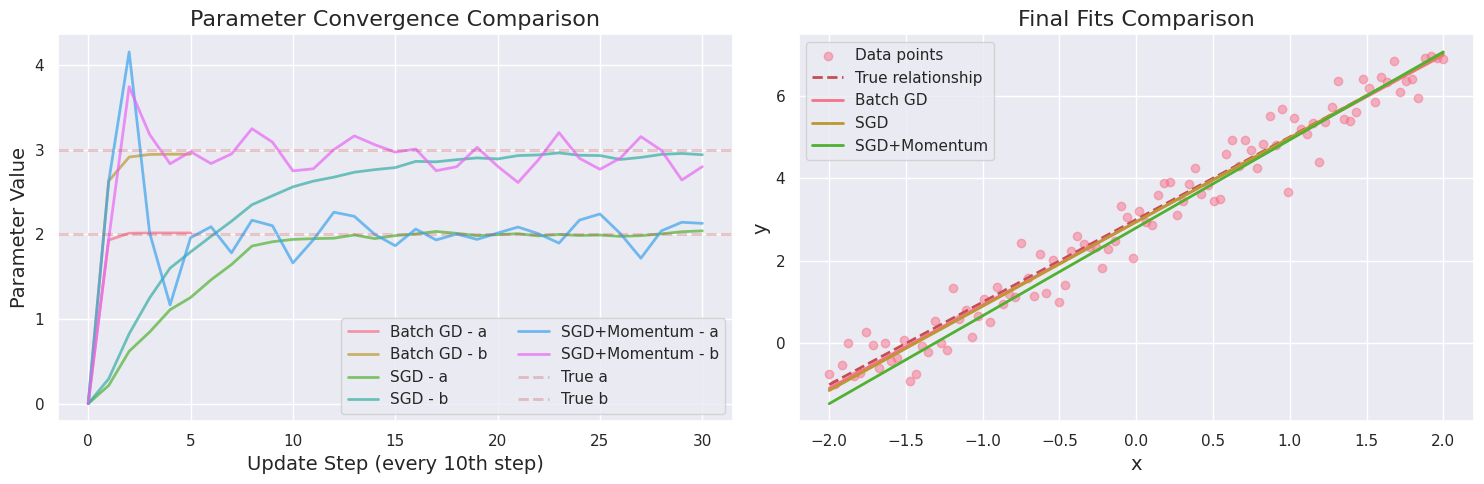

Batch GD final parameters: a = 2.017, b = 2.948
SGD final parameters: a = 2.042, b = 2.942
SGD+Momentum final parameters: a = 2.131, b = 2.800
True parameters: a = 2.000, b = 3.000


In [35]:
# Run SGD with momentum
a_history_mom, b_history_mom = sgd_momentum(X, y, learning_rate=0.01, momentum=0.9, n_epochs=3)

# Create visualization comparing all methods
plt.figure(figsize=(15, 5))

# Plot the parameter convergence
plt.subplot(1, 2, 1)
plt.plot(a_history[::10], label='Batch GD - a', alpha=0.7)
plt.plot(b_history[::10], label='Batch GD - b', alpha=0.7)
plt.plot(a_history_sgd[::10], label='SGD - a', alpha=0.7)
plt.plot(b_history_sgd[::10], label='SGD - b', alpha=0.7)
plt.plot(a_history_mom[::10], label='SGD+Momentum - a', alpha=0.7)
plt.plot(b_history_mom[::10], label='SGD+Momentum - b', alpha=0.7)
plt.axhline(y=2, color='r', linestyle='--', alpha=0.3, label='True a')
plt.axhline(y=3, color='r', linestyle='--', alpha=0.3, label='True b')
plt.grid(True)
plt.title('Parameter Convergence Comparison')
plt.xlabel('Update Step (every 10th step)')
plt.ylabel('Parameter Value')
plt.legend(ncol=2)

# Plot the final predictions
plt.subplot(1, 2, 2)
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, y_true, 'r--', label='True relationship')
plt.plot(X, a_history[-1] * X + b_history[-1], label='Batch GD')
plt.plot(X, a_history_sgd[-1] * X + b_history_sgd[-1], label='SGD')
plt.plot(X, a_history_mom[-1] * X + b_history_mom[-1], label='SGD+Momentum')
plt.grid(True)
plt.title('Final Fits Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Batch GD final parameters: a = {a_history[-1]:.3f}, b = {b_history[-1]:.3f}")
print(f"SGD final parameters: a = {a_history_sgd[-1]:.3f}, b = {b_history_sgd[-1]:.3f}")
print(f"SGD+Momentum final parameters: a = {a_history_mom[-1]:.3f}, b = {b_history_mom[-1]:.3f}")
print(f"True parameters: a = 2.000, b = 3.000")

### 2. AdaGrad (Adaptive Gradient)

AdaGrad adapts the learning rate for each parameter based on their historical gradients. It:
- Gives larger updates to parameters that are rarely updated
- Gives smaller updates to parameters that are frequently updated
- Is particularly good for sparse data

The update rule for AdaGrad is:
$s_t = s_{t-1} + (\nabla f(x_t))^2$
$x_{t+1} = x_t - \frac{\alpha}{\sqrt{s_t + \epsilon}} \nabla f(x_t)$

Where:
- $s_t$ accumulates squared gradients
- $\epsilon$ is a small constant to prevent division by zero
- The learning rate is automatically adjusted by $\frac{1}{\sqrt{s_t + \epsilon}}$

This means parameters that receive many updates will have their learning rate decrease more quickly.

In [36]:
def adagrad(X, y, learning_rate=0.1, epsilon=1e-8, n_epochs=10):
    """
    Perform AdaGrad optimization for linear regression.
    
    Parameters:
    -----------
    X : array-like
        Input features
    y : array-like
        Target values
    learning_rate : float
        Initial learning rate
    epsilon : float
        Small constant to prevent division by zero
    n_epochs : int
        Number of times to iterate through all data points
        
    Returns:
    --------
    tuple : Lists of parameter values (a, b) and adaptive learning rates
    """
    # Initialize parameters
    a = b = 0
    s_a = s_b = 0  # Accumulate squared gradients
    a_history = [a]
    b_history = [b]
    a_lr_history = []
    b_lr_history = []
    n = len(X)
    
    for epoch in range(n_epochs):
        indices = np.random.permutation(n)
        
        for i in indices:
            x_i, y_i = X[i], y[i]
            y_pred = a * x_i + b
            
            # Compute gradients
            grad_a = -2 * x_i * (y_i - y_pred)
            grad_b = -2 * (y_i - y_pred)
            
            # Accumulate squared gradients
            s_a += grad_a**2
            s_b += grad_b**2
            
            # Compute adaptive learning rates
            lr_a = learning_rate / (np.sqrt(s_a + epsilon))
            lr_b = learning_rate / (np.sqrt(s_b + epsilon))
            
            # Update parameters
            a = a - lr_a * grad_a
            b = b - lr_b * grad_b
            
            # Store history
            a_history.append(a)
            b_history.append(b)
            a_lr_history.append(lr_a)
            b_lr_history.append(lr_b)
            
    return a_history, b_history, a_lr_history, b_lr_history

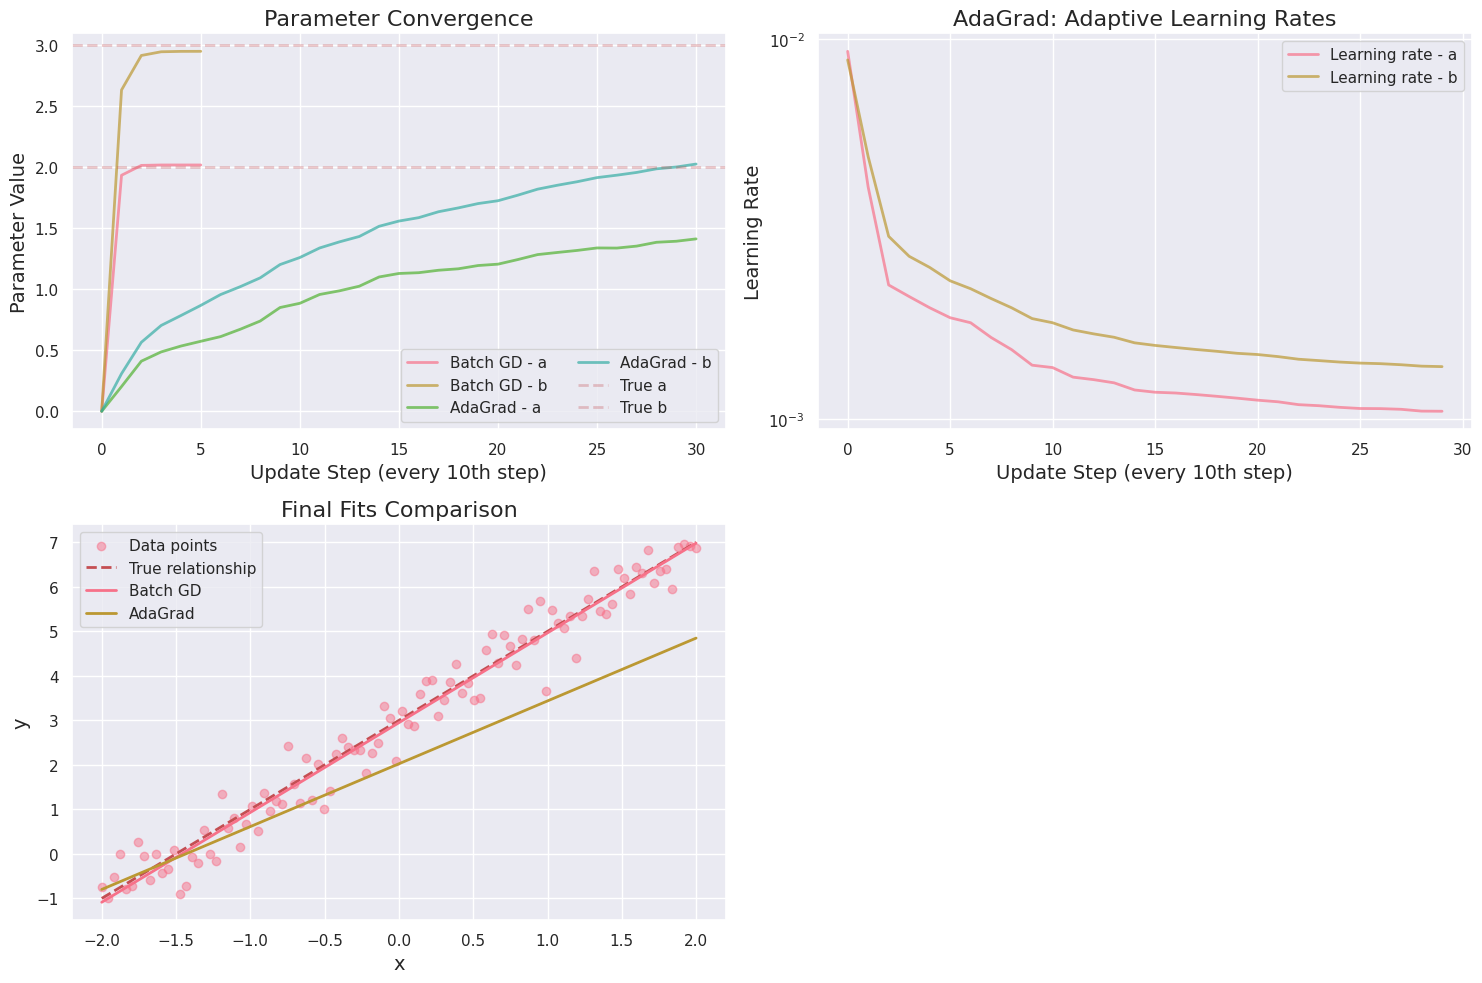

Batch GD final parameters: a = 2.017, b = 2.948
AdaGrad final parameters: a = 1.412, b = 2.025
True parameters: a = 2.000, b = 3.000


In [37]:
# Run AdaGrad
a_history_ada, b_history_ada, a_lr_ada, b_lr_ada = adagrad(X, y, learning_rate=0.1, n_epochs=3)

# Create visualizations
plt.figure(figsize=(15, 10))

# Plot parameter convergence
plt.subplot(2, 2, 1)
plt.plot(a_history[::10], label='Batch GD - a', alpha=0.7)
plt.plot(b_history[::10], label='Batch GD - b', alpha=0.7)
plt.plot(a_history_ada[::10], label='AdaGrad - a', alpha=0.7)
plt.plot(b_history_ada[::10], label='AdaGrad - b', alpha=0.7)
plt.axhline(y=2, color='r', linestyle='--', alpha=0.3, label='True a')
plt.axhline(y=3, color='r', linestyle='--', alpha=0.3, label='True b')
plt.grid(True)
plt.title('Parameter Convergence')
plt.xlabel('Update Step (every 10th step)')
plt.ylabel('Parameter Value')
plt.legend(ncol=2)

# Plot adaptive learning rates
plt.subplot(2, 2, 2)
plt.plot(a_lr_ada[::10], label='Learning rate - a', alpha=0.7)
plt.plot(b_lr_ada[::10], label='Learning rate - b', alpha=0.7)
plt.grid(True)
plt.title('AdaGrad: Adaptive Learning Rates')
plt.xlabel('Update Step (every 10th step)')
plt.ylabel('Learning Rate')
plt.legend()
plt.yscale('log')

# Plot final predictions
plt.subplot(2, 2, 3)
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, y_true, 'r--', label='True relationship')
plt.plot(X, a_history[-1] * X + b_history[-1], label='Batch GD')
plt.plot(X, a_history_ada[-1] * X + b_history_ada[-1], label='AdaGrad')
plt.grid(True)
plt.title('Final Fits Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Batch GD final parameters: a = {a_history[-1]:.3f}, b = {b_history[-1]:.3f}")
print(f"AdaGrad final parameters: a = {a_history_ada[-1]:.3f}, b = {b_history_ada[-1]:.3f}")
print(f"True parameters: a = 2.000, b = 3.000")

### 3. RMSProp

RMSProp (Root Mean Square Propagation) improves on AdaGrad by preventing the learning rate from decreasing too quickly. It:
- Uses an exponentially decaying average of squared gradients
- Maintains a more consistent learning rate throughout training
- Works well with non-convex functions

The update rule for RMSProp is:
$s_t = \gamma s_{t-1} + (1-\gamma)(\nabla f(x_t))^2$
$x_{t+1} = x_t - \frac{\alpha}{\sqrt{s_t + \epsilon}} \nabla f(x_t)$

Where:
- $\gamma$ is the decay rate (typically 0.9)
- The squared gradients are exponentially weighted
- This prevents the aggressive learning rate decay of AdaGrad

In [38]:
def rmsprop(X, y, learning_rate=0.01, gamma=0.9, epsilon=1e-8, n_epochs=10):
    """
    Perform RMSProp optimization for linear regression.
    
    Parameters:
    -----------
    X : array-like
        Input features
    y : array-like
        Target values
    learning_rate : float
        Initial learning rate
    gamma : float
        Decay rate for moving average
    epsilon : float
        Small constant to prevent division by zero
    n_epochs : int
        Number of times to iterate through all data points
        
    Returns:
    --------
    tuple : Lists of parameter values (a, b) and adaptive learning rates
    """
    # Initialize parameters
    a = b = 0
    s_a = s_b = 0  # Moving average of squared gradients
    a_history = [a]
    b_history = [b]
    a_lr_history = []
    b_lr_history = []
    n = len(X)
    
    for epoch in range(n_epochs):
        indices = np.random.permutation(n)
        
        for i in indices:
            x_i, y_i = X[i], y[i]
            y_pred = a * x_i + b
            
            # Compute gradients
            grad_a = -2 * x_i * (y_i - y_pred)
            grad_b = -2 * (y_i - y_pred)
            
            # Update moving averages
            s_a = gamma * s_a + (1 - gamma) * grad_a**2
            s_b = gamma * s_b + (1 - gamma) * grad_b**2
            
            # Compute adaptive learning rates
            lr_a = learning_rate / (np.sqrt(s_a + epsilon))
            lr_b = learning_rate / (np.sqrt(s_b + epsilon))
            
            # Update parameters
            a = a - lr_a * grad_a
            b = b - lr_b * grad_b
            
            # Store history
            a_history.append(a)
            b_history.append(b)
            a_lr_history.append(lr_a)
            b_lr_history.append(lr_b)
            
    return a_history, b_history, a_lr_history, b_lr_history

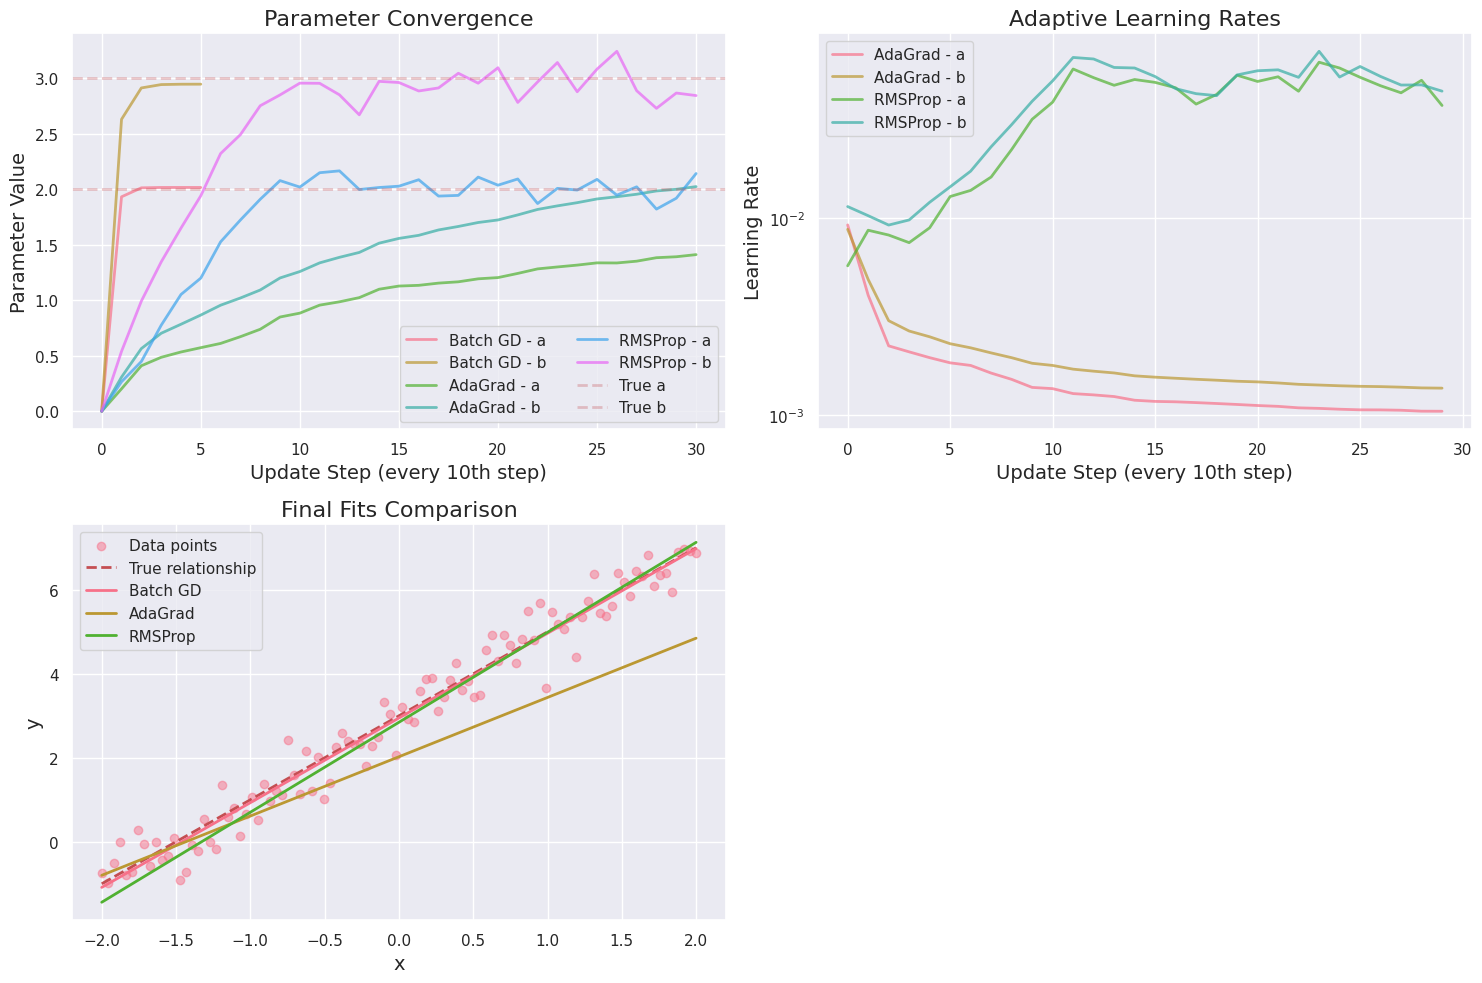

Batch GD final parameters: a = 2.017, b = 2.948
AdaGrad final parameters: a = 1.412, b = 2.025
RMSProp final parameters: a = 2.143, b = 2.845
True parameters: a = 2.000, b = 3.000


In [39]:
# Run RMSProp
a_history_rms, b_history_rms, a_lr_rms, b_lr_rms = rmsprop(X, y, learning_rate=0.05, n_epochs=3)

# Create visualization comparing all methods
plt.figure(figsize=(15, 10))

# Plot parameter convergence
plt.subplot(2, 2, 1)
plt.plot(a_history[::10], label='Batch GD - a', alpha=0.7)
plt.plot(b_history[::10], label='Batch GD - b', alpha=0.7)
plt.plot(a_history_ada[::10], label='AdaGrad - a', alpha=0.7)
plt.plot(b_history_ada[::10], label='AdaGrad - b', alpha=0.7)
plt.plot(a_history_rms[::10], label='RMSProp - a', alpha=0.7)
plt.plot(b_history_rms[::10], label='RMSProp - b', alpha=0.7)
plt.axhline(y=2, color='r', linestyle='--', alpha=0.3, label='True a')
plt.axhline(y=3, color='r', linestyle='--', alpha=0.3, label='True b')
plt.grid(True)
plt.title('Parameter Convergence')
plt.xlabel('Update Step (every 10th step)')
plt.ylabel('Parameter Value')
plt.legend(ncol=2)

# Plot adaptive learning rates comparison
plt.subplot(2, 2, 2)
plt.plot(a_lr_ada[::10], label='AdaGrad - a', alpha=0.7)
plt.plot(b_lr_ada[::10], label='AdaGrad - b', alpha=0.7)
plt.plot(a_lr_rms[::10], label='RMSProp - a', alpha=0.7)
plt.plot(b_lr_rms[::10], label='RMSProp - b', alpha=0.7)
plt.grid(True)
plt.title('Adaptive Learning Rates')
plt.xlabel('Update Step (every 10th step)')
plt.ylabel('Learning Rate')
plt.legend()
plt.yscale('log')

# Plot final predictions
plt.subplot(2, 2, 3)
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, y_true, 'r--', label='True relationship')
plt.plot(X, a_history[-1] * X + b_history[-1], label='Batch GD')
plt.plot(X, a_history_ada[-1] * X + b_history_ada[-1], label='AdaGrad')
plt.plot(X, a_history_rms[-1] * X + b_history_rms[-1], label='RMSProp')
plt.grid(True)
plt.title('Final Fits Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Batch GD final parameters: a = {a_history[-1]:.3f}, b = {b_history[-1]:.3f}")
print(f"AdaGrad final parameters: a = {a_history_ada[-1]:.3f}, b = {b_history_ada[-1]:.3f}")
print(f"RMSProp final parameters: a = {a_history_rms[-1]:.3f}, b = {b_history_rms[-1]:.3f}")
print(f"True parameters: a = 2.000, b = 3.000")

### 4. Adam (Adaptive Moment Estimation)

Adam combines the best of both momentum and RMSProp:
- Uses momentum (first moment) like SGD with momentum
- Uses adaptive learning rates (second moment) like RMSProp
- Includes bias correction for more accurate early updates

The update rules for Adam are:

First moment (momentum):
$m_t = \beta_1 m_{t-1} + (1-\beta_1)\nabla f(x_t)$
$\hat{m}_t = \frac{m_t}{1-\beta_1^t}$ (bias correction)

Second moment (adaptive learning rate):
$v_t = \beta_2 v_{t-1} + (1-\beta_2)(\nabla f(x_t))^2$
$\hat{v}_t = \frac{v_t}{1-\beta_2^t}$ (bias correction)

Parameter update:
$x_{t+1} = x_t - \frac{\alpha}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t$

Where:
- $\beta_1$ is typically 0.9 (momentum decay)
- $\beta_2$ is typically 0.999 (squared gradient decay)
- $\epsilon$ is a small constant (e.g., 1e-8)

In [40]:
def adam(X, y, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, n_epochs=10):
    """
    Perform Adam optimization for linear regression.
    
    Parameters:
    -----------
    X : array-like
        Input features
    y : array-like
        Target values
    learning_rate : float
        Initial learning rate
    beta1 : float
        Decay rate for first moment
    beta2 : float
        Decay rate for second moment
    epsilon : float
        Small constant to prevent division by zero
    n_epochs : int
        Number of times to iterate through all data points
        
    Returns:
    --------
    tuple : Lists of parameter values (a, b) and effective learning rates
    """
    # Initialize parameters
    a = b = 0
    m_a = m_b = 0  # First moment
    v_a = v_b = 0  # Second moment
    a_history = [a]
    b_history = [b]
    a_lr_history = []
    b_lr_history = []
    n = len(X)
    t = 1  # Time step for bias correction
    
    for epoch in range(n_epochs):
        indices = np.random.permutation(n)
        
        for i in indices:
            x_i, y_i = X[i], y[i]
            y_pred = a * x_i + b
            
            # Compute gradients
            grad_a = -2 * x_i * (y_i - y_pred)
            grad_b = -2 * (y_i - y_pred)
            
            # Update first moment (momentum)
            m_a = beta1 * m_a + (1 - beta1) * grad_a
            m_b = beta1 * m_b + (1 - beta1) * grad_b
            
            # Update second moment (adaptive learning rate)
            v_a = beta2 * v_a + (1 - beta2) * grad_a**2
            v_b = beta2 * v_b + (1 - beta2) * grad_b**2
            
            # Bias correction
            m_a_hat = m_a / (1 - beta1**t)
            m_b_hat = m_b / (1 - beta1**t)
            v_a_hat = v_a / (1 - beta2**t)
            v_b_hat = v_b / (1 - beta2**t)
            
            # Compute effective learning rates
            lr_a = learning_rate / (np.sqrt(v_a_hat) + epsilon)
            lr_b = learning_rate / (np.sqrt(v_b_hat) + epsilon)
            
            # Update parameters
            a = a - lr_a * m_a_hat
            b = b - lr_b * m_b_hat
            
            # Store history
            a_history.append(a)
            b_history.append(b)
            a_lr_history.append(lr_a)
            b_lr_history.append(lr_b)
            
            t += 1
            
    return a_history, b_history, a_lr_history, b_lr_history

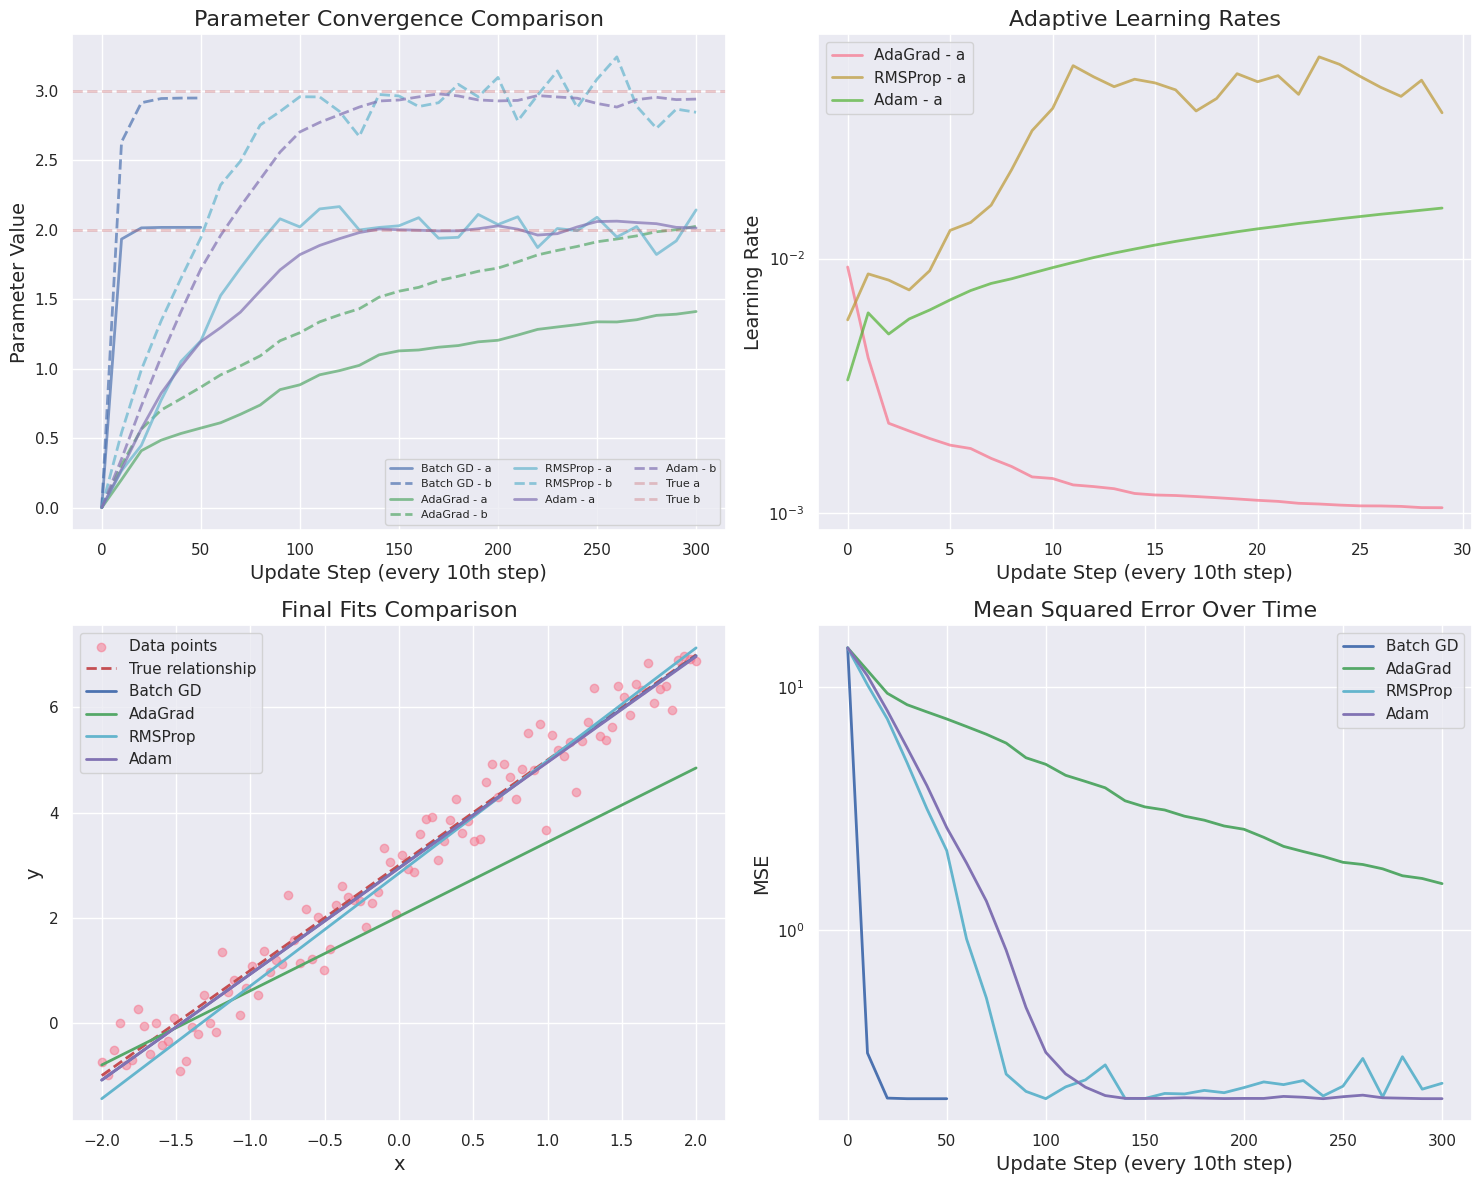


Final Parameters:
Method                   a          b
-----------------------------------
True Values          2.000      3.000
Batch GD             2.017      2.948
AdaGrad              1.412      2.025
RMSProp              2.143      2.845
Adam                 2.013      2.940


In [41]:
# Run Adam optimizer
a_history_adam, b_history_adam, a_lr_adam, b_lr_adam = adam(X, y, learning_rate=0.05, n_epochs=3)

# Create visualization comparing all methods
plt.figure(figsize=(15, 12))

# Plot parameter convergence
plt.subplot(2, 2, 1)
methods = ['Batch GD', 'AdaGrad', 'RMSProp', 'Adam']
a_histories = [a_history, a_history_ada, a_history_rms, a_history_adam]
b_histories = [b_history, b_history_ada, b_history_rms, b_history_adam]
colors = ['b', 'g', 'c', 'm']

for method, a_hist, b_hist, color in zip(methods, a_histories, b_histories, colors):
    plt.plot(range(0, len(a_hist), 10), a_hist[::10], f'{color}-', label=f'{method} - a', alpha=0.7)
    plt.plot(range(0, len(b_hist), 10), b_hist[::10], f'{color}--', label=f'{method} - b', alpha=0.7)

plt.axhline(y=2, color='r', linestyle='--', alpha=0.3, label='True a')
plt.axhline(y=3, color='r', linestyle='--', alpha=0.3, label='True b')
plt.grid(True)
plt.title('Parameter Convergence Comparison')
plt.xlabel('Update Step (every 10th step)')
plt.ylabel('Parameter Value')
plt.legend(ncol=3, fontsize=8)

# Plot adaptive learning rates comparison
plt.subplot(2, 2, 2)
plt.plot(a_lr_ada[::10], label='AdaGrad - a', alpha=0.7)
plt.plot(a_lr_rms[::10], label='RMSProp - a', alpha=0.7)
plt.plot(a_lr_adam[::10], label='Adam - a', alpha=0.7)
plt.grid(True)
plt.title('Adaptive Learning Rates')
plt.xlabel('Update Step (every 10th step)')
plt.ylabel('Learning Rate')
plt.legend()
plt.yscale('log')

# Plot final predictions
plt.subplot(2, 2, 3)
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, y_true, 'r--', label='True relationship')

for method, a_hist, b_hist, color in zip(methods, a_histories, b_histories, colors):
    plt.plot(X, a_hist[-1] * X + b_hist[-1], color=color, label=method)

plt.grid(True)
plt.title('Final Fits Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot error curves
plt.subplot(2, 2, 4)
for method, a_hist, b_hist, color in zip(methods, a_histories, b_histories, colors):
    errors = [np.mean((y - (a * X + b))**2) 
             for a, b in zip(a_hist, b_hist)]
    plt.plot(range(0, len(errors), 10), errors[::10], color=color, label=method)

plt.grid(True)
plt.title('Mean Squared Error Over Time')
plt.xlabel('Update Step (every 10th step)')
plt.ylabel('MSE')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

# Print final parameters
print("\nFinal Parameters:")
print(f"{'Method':15} {'a':>10} {'b':>10}")
print("-" * 35)
print(f"{'True Values':15} {'2.000':>10} {'3.000':>10}")
for method, a_hist, b_hist in zip(methods, a_histories, b_histories):
    print(f"{method:15} {a_hist[-1]:10.3f} {b_hist[-1]:10.3f}")

## Summary and Comparison

Let's analyze the behavior of all optimization methods we've covered:

1. **Batch Gradient Descent**
   - Uses all data for each update
   - Very stable convergence
   - Computationally expensive for large datasets
   - May get stuck in local minima

2. **Stochastic Gradient Descent (SGD)**
   - Uses one random data point per update
   - Faster iteration time
   - Noisier updates
   - Can escape local minima
   - May require learning rate scheduling

3. **SGD with Momentum**
   - Adds "momentum" to updates
   - Helps overcome local minima and plateaus
   - Smoother convergence than pure SGD
   - May overshoot on steep curves

4. **AdaGrad**
   - Adapts learning rate per parameter
   - Great for sparse data
   - Learning rate can decay too quickly
   - No momentum term

5. **RMSProp**
   - Prevents learning rate decay problem
   - Works well with non-convex functions
   - More stable than AdaGrad
   - Still no momentum term

6. **Adam**
   - Combines momentum and adaptive learning rates
   - Includes bias correction
   - Generally works well out-of-the-box
   - May not generalize as well as SGD

### Best Practices

1. **For Simple Problems**
   - Start with standard SGD
   - Add momentum if convergence is slow
   
2. **For Complex Problems**
   - Try Adam first (it often works well)
   - If overfitting occurs, switch to SGD
   
3. **For Sparse Data**
   - Consider AdaGrad or Adam
   
4. **When in Doubt**
   - Start with Adam
   - Monitor validation performance
   - Switch to SGD+Momentum if needed

Remember: No single optimizer is best for all problems!